In [128]:
import gym
import gym_anytrading
import pandas as pd
from gym_anytrading.envs import TradingEnv, ForexEnv, StocksEnv, Actions, Positions
import yfinance as yf
import tf_slim as slim
import numpy as np
from matplotlib import pyplot as plt
from stable_baselines3 import DQN
import quantstats as qs
from stable_baselines3 import A2C
from stable_baselines.common.vec_env import DummyVecEnv

env = gym.make('forex-v0')
# env = gym.make('stocks-v0')

df = yf.download('BTC-USD', start='2021-01-01',
                   end='2022-12-12', interval='1h', back_adjust=True, auto_adjust=True, prepost=True)






def my_process_data(env):
    start = env.frame_bound[0] - env.window_size
    end = env.frame_bound[1]
    prices = env.df.loc[:, 'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:, ['Close', 'Open', 'High', 'Low']].to_numpy()[start:end]
    return prices, signal_features


class MyForexEnv(ForexEnv):
    _process_data = my_process_data




[*********************100%***********************]  1 of 1 completed


In [129]:
env = MyForexEnv(df=df, window_size=12, frame_bound=(12, len(df)))


print("env information:")
print("> shape:", env.shape)
print("> df.shape:", env.df.shape)
print("> prices.shape:", env.prices.shape)
print("> signal_features.shape:", env.signal_features.shape)
print("> max_possible_profit:", env.max_possible_profit())

env information:
> shape: (12, 4)
> df.shape: (10899, 5)
> prices.shape: (10899,)
> signal_features.shape: (10899, 4)
> max_possible_profit: 5457923796360.621


In [136]:
model_train = DQN('MlpPolicy', env, verbose=1)
model_train.learn(total_timesteps=100000)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 886       |
|    ep_rew_mean      | -4.01e+07 |
|    exploration_rate | 0.663     |
| time/               |           |
|    episodes         | 4         |
|    fps              | 34610     |
|    time_elapsed     | 0         |
|    total_timesteps  | 3544      |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 886       |
|    ep_rew_mean      | -7.36e+07 |
|    exploration_rate | 0.327     |
| time/               |           |
|    episodes         | 8         |
|    fps              | 34774     |
|    time_elapsed     | 0         |
|    total_timesteps  | 7088      |
-----------------------------------
-----------------------------------
| rollout/            |           |
|    ep_len_mean      | 886       |
|    e

In [137]:
env = MyForexEnv(df=df, window_size=12, frame_bound=(12, len(df)-10000))
obs = env.reset()
while True:
    #obs = obs[np.newaxis, ...]
    action, _states = model_train.predict(obs)
    obs, rewards, done, info = env.step(action)
    if done:
        print("info", info)
        break

info {'total_reward': 140379433.59375, 'total_profit': 1.0573657246775319, 'position': 0}


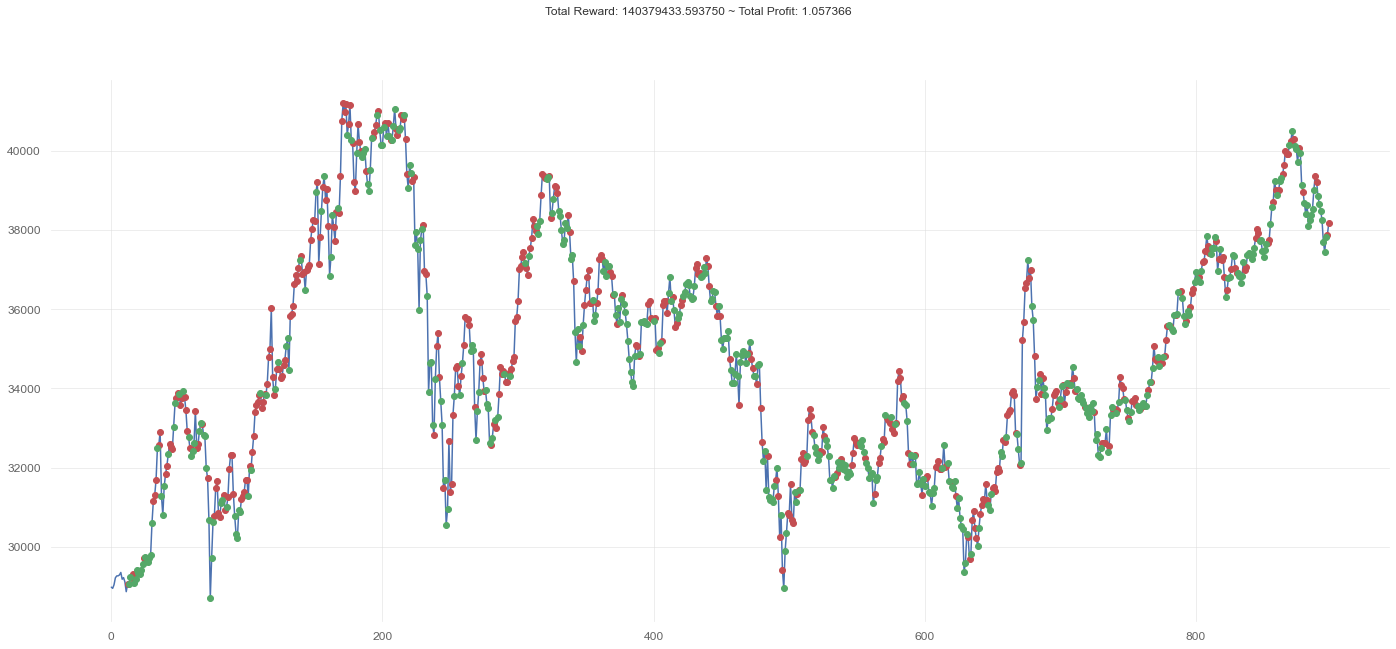

In [138]:

plt.figure(figsize=(24,10))
env.render_all()
plt.show()

In [139]:
qs.extend_pandas()

net_worth = pd.Series(env.history['total_profit'], index=df.index[12+1:len(df)-10000])
returns = net_worth.pct_change().iloc[1:]

qs.reports.full(returns)
qs.reports.html(returns, output='a2c_quantstats.html')

TypeError: Invalid comparison between dtype=datetime64[ns, UTC] and datetime

In [140]:
env.history

{'total_reward': [-1873320.3125,
  -1873320.3125,
  -255488.28125,
  -255488.28125,
  1044687.5,
  1044687.5,
  1044687.5,
  1044687.5,
  1044687.5,
  1044687.5,
  1044687.5,
  7340214.84375,
  6965195.3125,
  6965195.3125,
  6965195.3125,
  6965195.3125,
  6965195.3125,
  6965195.3125,
  21023203.125,
  21023203.125,
  21023203.125,
  7696542.96875,
  8326289.0625,
  8326289.0625,
  21138925.78125,
  21138925.78125,
  21138925.78125,
  26684277.34375,
  26684277.34375,
  21684394.53125,
  24211386.71875,
  24211386.71875,
  24211386.71875,
  19697285.15625,
  19697285.15625,
  26906699.21875,
  26906699.21875,
  25831308.59375,
  22987207.03125,
  22987207.03125,
  19427285.15625,
  17831933.59375,
  17831933.59375,
  17831933.59375,
  27985000.0,
  25375488.28125,
  27421035.15625,
  27421035.15625,
  27421035.15625,
  38839121.09375,
  38839121.09375,
  38839121.09375,
  43898808.59375,
  43898808.59375,
  45699042.96875,
  48490761.71875,
  48490761.71875,
  48490761.71875,
  37485